In [1]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import torch
from matplotlib import animation, rc
from IPython.display import HTML
from IPython import display

%matplotlib inline

In [2]:
import gym.spaces
import gym
import FastSLAM
import hw6_ppo
#importlib.reload(FastSLAM);
# importlib.reload(hw6_ppo);

# PPO training

In [3]:
env = gym.make('FastSLAM-v0')
agent = hw6_ppo.PPOAgent(env)

/home/akshay_shetty160992/.local/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [4]:
save_model = 'case1'
load_model = 'case1'

gamma = 0.99
lamb = 0.95
number_of_actors = 8
number_of_iterations = 1
horizon = 100
number_of_epochs = 10
minibatch_size = 64
logstd_initial = -1 #-0.7
logstd_final = -2 # -1.6
epsilon = 0.2
use_multiprocess = True
res = agent.train(
    save_model,
    load_model,
    gamma,
    lamb,
    number_of_actors,
    number_of_iterations,
    horizon,
    number_of_epochs,
    minibatch_size,
    logstd_initial,
    logstd_final,
    epsilon,
    use_multiprocess,
)

==== model case1 loaded ====
0 1.9713428614199153
==== model case1 saved ====


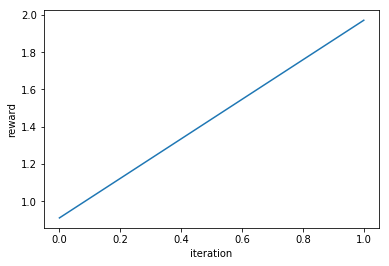

In [5]:
plt.plot(res['rewards'])
plt.xlabel('iteration')
plt.ylabel('reward');

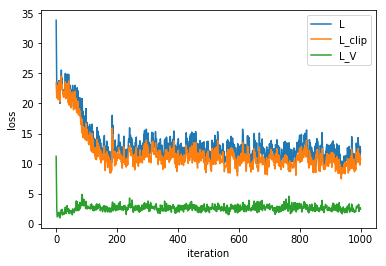

In [12]:
plt.plot(res['losses'], label='L')
plt.plot(res['losses_clip'], label='L_clip')
plt.plot(res['losses_V'], label='L_V')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend();

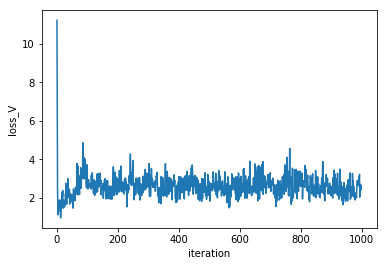

In [13]:
plt.plot(res['losses_V'], label='L_V')
plt.xlabel('iteration')
plt.ylabel('loss_V');

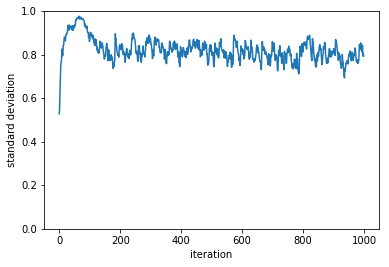

In [14]:
plt.plot(res['stds'])
plt.xlabel('iteration')
plt.gca().set_ylim(bottom=0)
plt.ylabel('standard deviation');

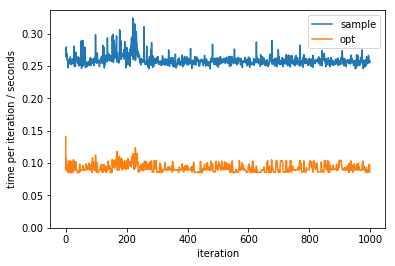

In [15]:
plt.plot(res['times_sample'], label='sample')
plt.plot(res['times_opt'], label='opt')
plt.gca().set_ylim(bottom=0)
plt.legend();
plt.xlabel('iteration')
plt.ylabel('time per iteration / seconds');

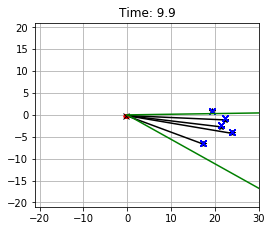

In [6]:
state = env.reset()
a_, r_, mu_, sigma_, _state_ = [], [], [], [], []
horizon = 100
for t in range(1,horizon):
    _state_.append(state)
    action = agent.action_greedy(state)

    state_, reward, done, _ = env.step(action[0])

    a_.append(action[0])
    r_.append(reward)
    state = state_
    
    env.render_world()
    display.clear_output(wait=True)
    plt.pause(0.001)

average reward per step = 4.879845104341524


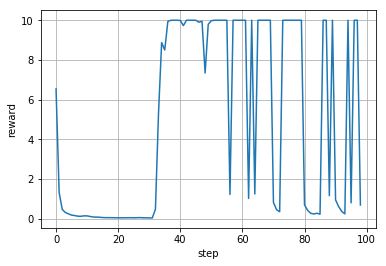

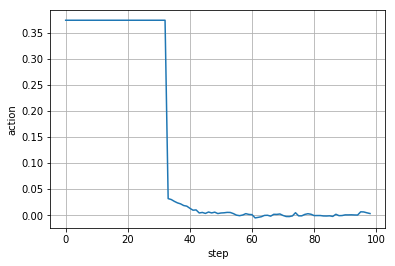

In [7]:
print(f'average reward per step = {sum(r_) / float(len(r_))}')

plt.plot(r_)
plt.xlabel('step')
plt.ylabel('reward')
plt.grid()
plt.show()

plt.plot(a_)
plt.xlabel('step')
plt.ylabel('action')
plt.grid()
plt.show()